In [1]:
import torch
from torch.utils.data import Dataset, DataLoader #dataset và loading

In [3]:
torch.cuda.is_available()

True

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

## Tensor

In [5]:
A= [1, 2, 3, 4, 5, 6]
A= Tensor(A)
A

tensor([1., 2., 3., 4., 5., 6.])

In [6]:
A= A.unsqueeze(0)
A

tensor([[1., 2., 3., 4., 5., 6.]])

In [7]:
A=A.reshape(2,3)
A

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [8]:
A=A.transpose(1,0)
A

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [9]:
A.t()

tensor([[1., 2., 3.],
        [4., 5., 6.]])

In [10]:
A.to(device)
A

/home/huynv/.local/lib/python3.9/site-packages/torch/cuda/__init__.py:122: UserWarning: 
    Found GPU0 Quadro K1100M which is of cuda capability 3.0.
    PyTorch no longer supports this GPU because it is too old.
    The minimum cuda capability supported by this library is 3.7.
    
  warnings.warn(old_gpu_warn % (d, name, major, minor, min_arch // 10, min_arch % 10))


tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [11]:
A.numpy()


array([[1., 4.],
       [2., 5.],
       [3., 6.]], dtype=float32)

## Autograd

In [12]:
a=A
a

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])

In [13]:
a.requires_grad                                                             

False

In [14]:
a.requires_grad = True
a.requires_grad

True

In [15]:
b = a**2
b.requires_grad

True

In [20]:
x = torch.tensor([3])
y = torch.tensor([10])
a= torch.tensor([1.], requires_grad= True)
b= torch.tensor([2.], requires_grad= True)

y_hat = a*x +b
z = y_hat - y
L = z**2

print(x.is_leaf) # tensor do mk khoi tao
print(a.is_leaf) # 
print(y_hat.is_leaf) # tensor do mktinh toan  tao ra
print(L.is_leaf) # 

True
True
False
False


In [21]:
L.backward() # tinh dao ham
print(a.grad) # -30
print(b.grad) # -10

tensor([-30.])
tensor([-10.])


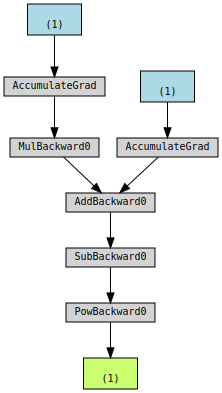

In [23]:
from torchviz import make_dot
make_dot(L) # truc quan hoa

In [24]:
# def forward(ctx, input): nhận các tensor inputs, và trả về tensor output. Biến ctx để lưu lại các tensor cần thiết trong quá trình backward (chain rule).
# def backward(ctx, grad_output): grad_output chứa đạo hàm của loss đến tensor ở node đấy, ctx lấy các giá trị lưu ở hàm forward để tính đạo hàm ngược qua node đó.

In [28]:
class MySquare(torch.autograd.Function):

    @staticmethod
    def forward(ctx, input):
        ctx.save_for_backward(input)
        return input**2

    @staticmethod
    def backward(ctx, grad_output):
        input, = ctx.saved_tensors
        return 2*input*grad_output

# alias để gọi hàm
my_square = MySquare.apply

# xây lại graph
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)

y_hat = a*x + b
z = y_hat - y
L = my_square(z)
make_dot(L)
L.backward()
print(a.grad) 
print(b.grad) 

tensor([-30.])
tensor([-10.])


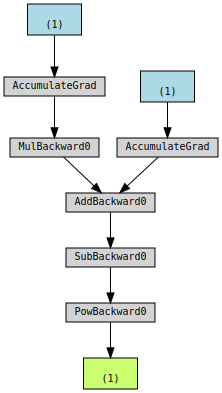

In [30]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
b = torch.tensor([2.], requires_grad=True)
c = a*x
y_hat = c + b
z = y_hat - y
L = z**2
make_dot(L)

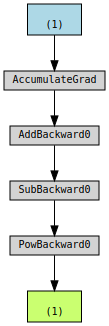

In [31]:
x = torch.tensor([3])
y = torch.tensor([10])
a = torch.tensor([1.], requires_grad=True)
a.requires_grad = False
b = torch.tensor([2.], requires_grad=True)
c = a*x
y_hat = c + b
z = y_hat - y
L = z**2
make_dot(L)